# <p style="text-align: center;">TP Titanic</p>

## Consignes

- Analyse des données du Titanic
- Un modèle directement interprétable
- Un modèle non interprétable directement **mais** l’utilisation d’une librairie au choix
- Utilisation d’une technique de Vigilance au biais

## Evaluation

Fond :
- Pertinence des analyses
- Qualité du code
- Maitrise des techniques de DS

Forme :
- Clarté des explications
- Qualité des illustrations (graphs, figures…)
- Cohérence de l’histoire racontée

----

**Analyse des données du Titanic**

* Importer les librairies 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* Importer les données

In [2]:
data = pd.read_csv("C:/Users/sophi/Desktop/DESU Data analyse appliquée aux Neurosciences/Devoir Titanic/Data_Titanic.csv")

* Explorer les données

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [6]:
print (data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


* Visualiser et nettoyer les données

0    549
1    342
Name: Survived, dtype: int64


[Text(0, 0, '549'), Text(0, 0, '342')]

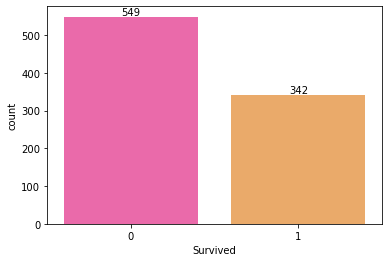

In [7]:
print (data['Survived'].value_counts())
ax=sns.countplot(x='Survived', data=data, palette='spring')
ax.bar_label(ax.containers[0])

[Text(0, 0, '577'), Text(0, 0, '314')]

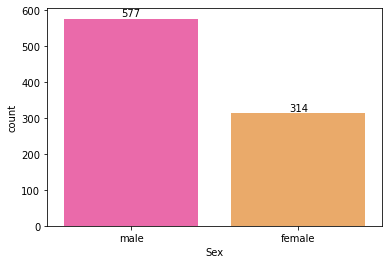

In [8]:
ax=sns.countplot(x='Sex', data=data, palette='spring')
ax.bar_label(ax.containers[0])

[Text(0, 0, '81'), Text(0, 0, '233')]

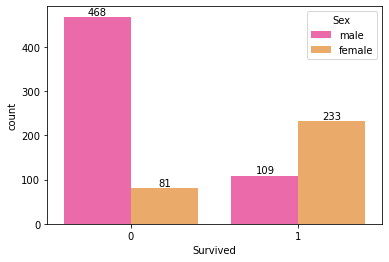

In [9]:
ax=sns.countplot(x='Survived', hue='Sex', data=data, palette='spring')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
# Plus d'hommes DCD et plus de femmes survivantes

Plus d'hommes que de femmes étaient présents sur le bateau.

Plus d'hommes que de femmes sont effectivement morts lors du naufrage mais plus de femmes que d'hommes ont survécu.

[Text(0, 0, '216'), Text(0, 0, '184'), Text(0, 0, '491')]

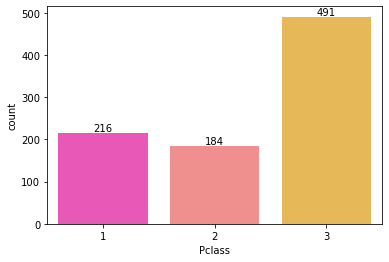

In [10]:
ax=sns.countplot(x='Pclass', data=data, palette='spring')
ax.bar_label(ax.containers[0])

[Text(0, 0, '372'), Text(0, 0, '119')]

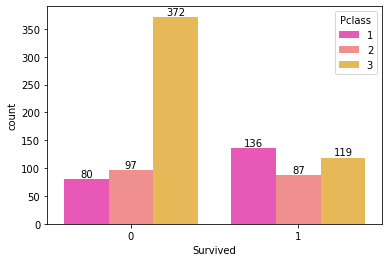

In [11]:
ax=sns.countplot(x='Survived', hue='Pclass', data=data, palette='spring')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
# Semble y avoir plus de survivants au sein de la première classe et beaucoup plus de DC au sein de la troisième.

De la même manière que les femmes et hommes, bien que moins nombreux à bord, les personnes en première classe ont plus survécu.

Text(0.5, 1.0, "Répartition des survivants et décédés selon l'age pour chaque classe")

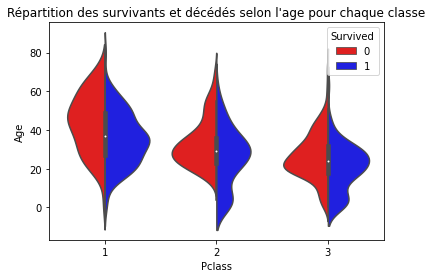

In [12]:
# Répartition des survivants et des DCD différente selon l'age et entre les classes 
sns.violinplot(x='Pclass', y='Age', hue='Survived', split=True, data=data, palette={0 : "r", 1 : "b"})
plt.title ("Répartition des survivants et décédés selon l'age pour chaque classe")

In [13]:
#Est-ce qu'il y a des Doublons?
data.duplicated().sum() #pas de doublons !

0

In [14]:
#Est-ce qu'il y a des valeurs manquantes ? Oui
data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

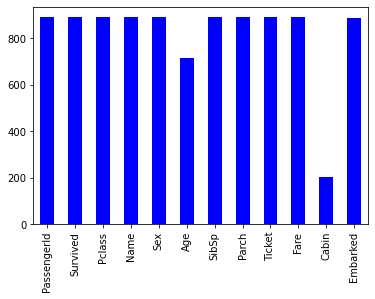

In [15]:
data.count().plot(kind='bar', color="blue")
#La colonne cabin a beaucoup de NaN
#Les colonnes age et embarked ont également des valeurs manquantes 

Remplacer les valeurs manquantes et convertir en valeurs numériques :

1) Colonne Cabin

Pour la colonne cabin, valeur manquante = pas de cabine, numéro de cabine disponible = cabine --> binaire

Je remplace les NaN par la valeur 0, et les numéros de cabine par la valeur 1

In [16]:
data['Cabin'].fillna(0, inplace=True)
data.loc[data['Cabin'] != 0, 'Cabin'] = 1
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500     0        S  
1      0          PC 17599  71.2833     1        C  
2      0  STON/O2. 3101282   7.9250     0        S  
3      0            113803  53.1000     1        S  
4      0            373450   8.0500     0        S

J'ai bien une numérotation binaire au sein de la colonne : 

1 = cabine, 0 = Pas de cabine.

In [17]:
data.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00     0        S  
887  female  19.0      0      0      112053  30.00     1        S  
888  female   NaN      1      2  W./C. 6607  23.45     0        S  
889    male  26.0      0      0      111369  30.00     1        C  
890    male  32.0      0      0      370376   7.75     0        Q

<AxesSubplot:>

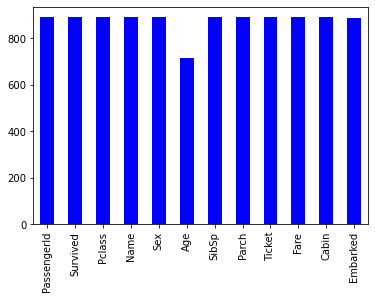

In [18]:
data.count().plot(kind='bar', color="blue")
#la colonne cabin ne comprend désormais que des valeurs, donc plus de NaN

In [19]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

2) Colonnes Age et Embarked

-- 177 valeurs manquantes pour l'âge, ce serait dommage de supprimer autant de données, plutôt imputer les valeurs d'âge manquantes. Seules deux valeurs manquantes pour embarked, imputable aussi.

-- Plusieurs méthodes d'imputation possibles : simple imputer, iterative imputer, kNN imputer

In [20]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

Difficilement transformer chaque nom en valeur numérique sans perdre l'information de l'écriture du nom et à priori le numéro de ticket et l'id ne contiennent pas d'information particulière. Je supprime ces colonnes.

In [21]:
data=data.drop(['Name', 'Ticket','PassengerId'], axis=1)

Transformation de toutes les valeurs en type numérique puis imputation à tout le dataframe
Deux colonnes à transformer : sexe et embarked. Fonction get_dummies

In [22]:
Colonnes = data[['Sex', 'Embarked']]
ColonnesConverties = pd.get_dummies(Colonnes, drop_first=True)

In [23]:
ColonnesConverties.head()

Sex_male  Embarked_Q  Embarked_S
0         1           0           1
1         0           0           0
2         0           0           1
3         0           0           1
4         1           0           1

In [24]:
# On remplace les anciennes colonnes avec les nouvelles créées, qui ne contiennent que des valeurs numériques.

data = data.drop(['Sex', 'Embarked'], axis=1)
data = pd.concat([data, ColonnesConverties], axis=1)
data.head()

Survived  Pclass   Age  SibSp  Parch     Fare Cabin  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500     0         1           0   
1         1       1  38.0      1      0  71.2833     1         0           0   
2         1       3  26.0      0      0   7.9250     0         0           0   
3         1       1  35.0      1      0  53.1000     1         0           0   
4         0       3  35.0      0      0   8.0500     0         1           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

In [25]:
data.tail() # exemple 888 : age=Nan

Survived  Pclass   Age  SibSp  Parch   Fare Cabin  Sex_male  Embarked_Q  \
886         0       2  27.0      0      0  13.00     0         1           0   
887         1       1  19.0      0      0  30.00     1         0           0   
888         0       3   NaN      1      2  23.45     0         0           0   
889         1       1  26.0      0      0  30.00     1         1           0   
890         0       3  32.0      0      0   7.75     0         1           1   

     Embarked_S  
886           1  
887           1  
888           1  
889           0  
890           0

In [26]:
#Imputation
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

<AxesSubplot:>

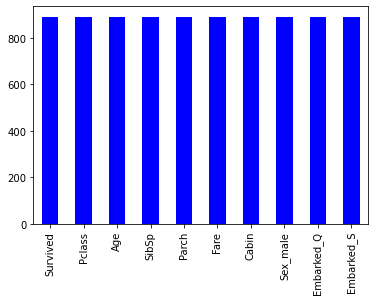

In [27]:
data.count().plot(kind='bar', color="blue") 
#Désormais, toutes les colonnes contiennent le même nombre de valeurs, il n'y a plus de NaN

In [28]:
data.tail()#exemple : age de 888 n'est plus un Nan

Survived  Pclass   Age  SibSp  Parch   Fare  Cabin  Sex_male  Embarked_Q  \
886       0.0     2.0  27.0    0.0    0.0  13.00    0.0       1.0         0.0   
887       1.0     1.0  19.0    0.0    0.0  30.00    1.0       0.0         0.0   
888       0.0     3.0  20.0    1.0    2.0  23.45    0.0       0.0         0.0   
889       1.0     1.0  26.0    0.0    0.0  30.00    1.0       1.0         0.0   
890       0.0     3.0  32.0    0.0    0.0   7.75    0.0       1.0         1.0   

     Embarked_S  
886         1.0  
887         1.0  
888         1.0  
889         0.0  
890         0.0

In [29]:
data.isna().sum() #plus de nan !

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

aide/source : https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

* Séparation dataset entrainement et dataset test

In [30]:
X = data.drop('Survived', axis=1)
y= data['Survived']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Modèle directement interprétable**

* Régression logistique

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logistic_regression = LogisticRegression(max_iter=300)

In [34]:
lr = logistic_regression.fit(X_train, y_train)

In [35]:
y_pred = logistic_regression.predict(X_test)
y_pred

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1.])

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
accuracy_score(y_test, y_pred)

0.8212290502793296

In [38]:
y_test.shape

(179,)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       105
         1.0       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [40]:
LR_confusion_matrix = confusion_matrix(y_test, y_pred)
print (LR_confusion_matrix)

[[91 14]
 [18 56]]


<AxesSubplot:>

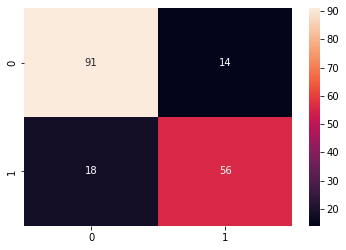

In [41]:
sns.heatmap(LR_confusion_matrix, annot=True)

In [42]:
lr.coef_

array([[-7.94155901e-01, -3.36579981e-02, -3.07934226e-01,
        -1.21246084e-01,  1.67288012e-03,  6.29006468e-01,
        -2.53141905e+00, -9.20535935e-02, -3.68706298e-01]])

In [43]:
OddsRatio=np.exp(lr.coef_)
print(OddsRatio)

[[0.45196258 0.96690213 0.73496366 0.88581595 1.00167428 1.87574604
  0.07954606 0.91205627 0.69162851]]


In [44]:
from sklearn.inspection import PartialDependenceDisplay

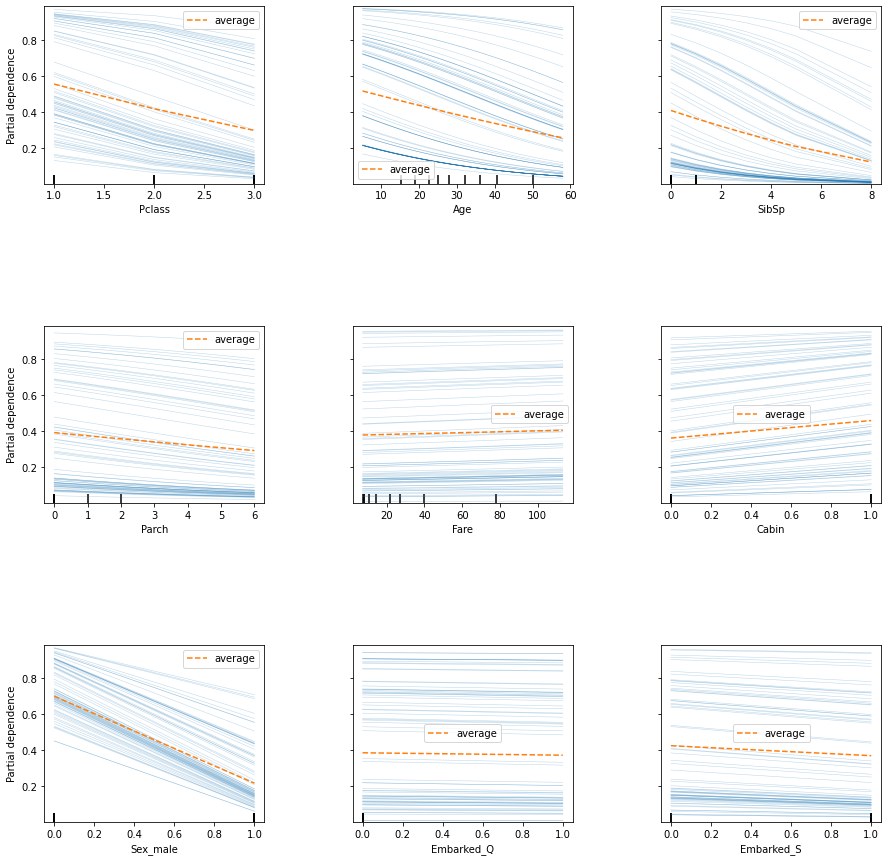

In [45]:
fig = PartialDependenceDisplay.from_estimator(lr, X, X.columns, kind="both", subsample = 70)
fig.figure_.subplots_adjust(wspace=0.4, hspace=0.8)
fig.figure_.set_figheight(15)
fig.figure_.set_figwidth(15)

* Arbre de décision

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
decision_tree = DecisionTreeClassifier(max_depth=2)

In [48]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [49]:
tree_prediction = decision_tree.predict(X_test)

In [50]:
y_val = decision_tree.predict(X_train)
accuracy_score(y_train, y_val)

0.8033707865168539

In [51]:
decision_tree.score(X_test,y_test)

0.7653631284916201

In [52]:
accuracy_score(y_test, tree_prediction)

0.7653631284916201

In [53]:
print(classification_report(y_test, tree_prediction))

              precision    recall  f1-score   support

         0.0       0.73      0.95      0.83       105
         1.0       0.88      0.50      0.64        74

    accuracy                           0.77       179
   macro avg       0.81      0.73      0.73       179
weighted avg       0.79      0.77      0.75       179



In [54]:
DT_confusion_matrix = confusion_matrix(y_test, tree_prediction)
print (DT_confusion_matrix)

[[100   5]
 [ 37  37]]


<AxesSubplot:>

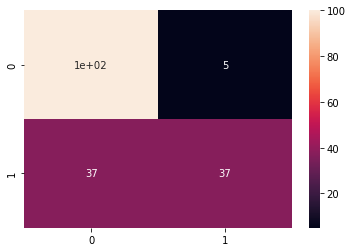

In [55]:
sns.heatmap(DT_confusion_matrix, annot=True)

[Text(0.5, 0.8333333333333334, 'X[6] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(0.25, 0.5, 'X[0] <= 2.5\ngini = 0.386\nsamples = 245\nvalue = [64, 181]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.074\nsamples = 130\nvalue = [5, 125]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 115\nvalue = [59, 56]'),
 Text(0.75, 0.5, 'X[1] <= 6.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.434\nsamples = 22\nvalue = [7, 15]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.271\nsamples = 445\nvalue = [373, 72]')]

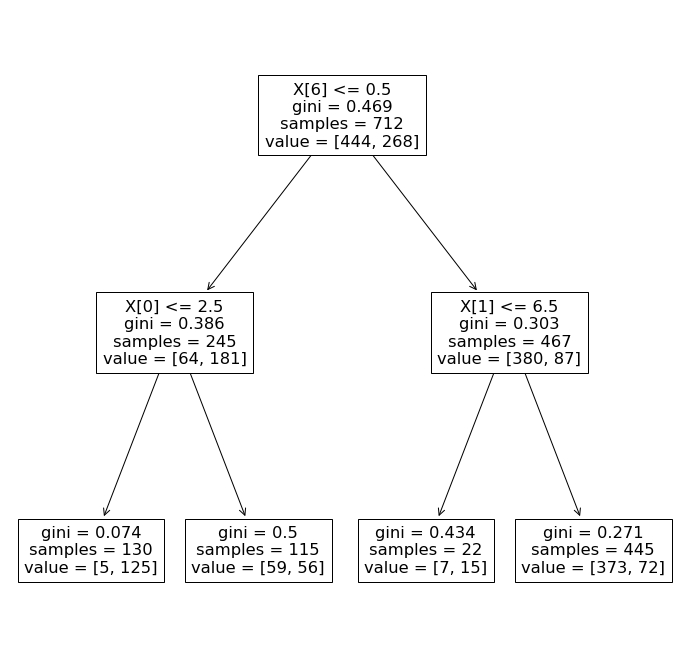

In [56]:
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 12))
tree.plot_tree(decision_tree) 

**Modèle non directement interprétable**

* Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
RF = RandomForestClassifier(max_depth=10, n_estimators = 100)

In [60]:
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [61]:
rf_prediction = RF.predict(X_test)

In [62]:
accuracy_score(y_test, rf_prediction)

0.8379888268156425

In [63]:
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       105
         1.0       0.83      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [64]:
RF_confusion_matrix = confusion_matrix(y_test, rf_prediction)
print(RF_confusion_matrix)

[[93 12]
 [17 57]]


<AxesSubplot:>

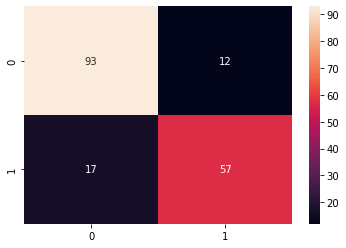

In [65]:
sns.heatmap(RF_confusion_matrix, annot=True)

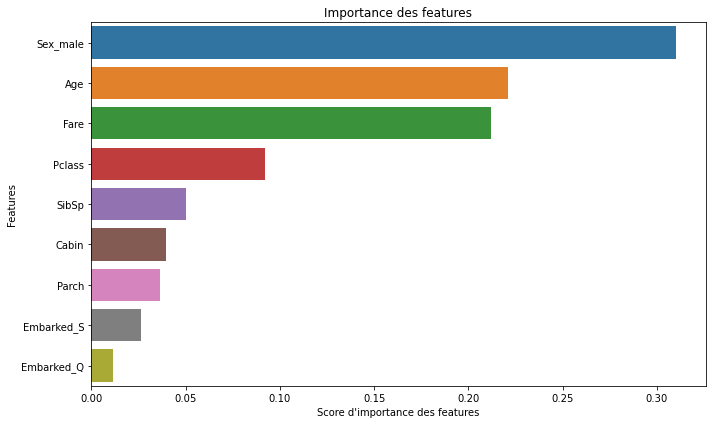

In [66]:
#https://medium.com/analytics-vidhya/random-forest-on-titanic-dataset-88327a014b4d

FeatureImportance = pd.Series(RF.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=FeatureImportance, y=FeatureImportance.index)
# Légendes et apparence
plt.xlabel("Score d'importance des features")
plt.ylabel('Features')
plt.title("Importance des features")
plt.tight_layout()

#Pour un modèle plus explicable

* Réseau de neurones

In [67]:
from sklearn.neural_network import MLPClassifier

In [68]:
MLPC = MLPClassifier(hidden_layer_sizes=(10,20), max_iter=500)

In [69]:
MLPC.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 20), max_iter=500)

In [70]:
prediction = MLPC.predict(X_test)
accuracy_score(y_test, prediction)

0.7653631284916201

In [71]:
confusion_matrix(y_test, prediction)

array([[83, 22],
       [20, 54]], dtype=int64)

In [72]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       105
         1.0       0.71      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



**Cross validation**

In [73]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logistic_regression, X, y, cv=5)
print ('Cross validation - Régression logistique :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - Régression logistique :
scores =  [0.79888268 0.79775281 0.80898876 0.78651685 0.81460674]
score moyen = 0.8013495700207145


In [74]:
scores = cross_val_score(decision_tree, X, y, cv=5)
print ('Cross validation - Arbre de décision :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - Arbre de décision :
scores =  [0.74860335 0.79213483 0.79213483 0.75842697 0.78651685]
score moyen = 0.775563367020275


In [75]:
scores = cross_val_score(RF, X, y, cv=5)
print ('Cross validation - Random forest :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - Random forest :
scores =  [0.81564246 0.80337079 0.85393258 0.81460674 0.86516854]
score moyen = 0.8305442219571904


In [76]:
scores = cross_val_score(MLPC, X, y, cv=5)
print ('Cross validation - Réseau de neurones :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

C:\Users\sophi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross validation - Réseau de neurones :
scores =  [0.75418994 0.76966292 0.76966292 0.78651685 0.84831461]
score moyen = 0.7856694495009731


D'après les résultats des cross-validations, il semble que parmi les deux modèles directement interprétables, la **régression logistique** a le meileur score moyen d'accuracy, et parmi les 2 modèles non directement interprétable, c'est le **random forest** a le meilleur score moyen.

**Interprétabilité**

**Librairie Lime, interprétabilité random forest classifier**

site source : 
https://betterdatascience.com/lime/

In [77]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [78]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=[0, 1],
    mode='classification'
)

In [79]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=RF.predict_proba
)

exp.show_in_notebook(show_table=True)

C:\Users\sophi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [80]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[4], 
    predict_fn=RF.predict_proba
)

exp.show_in_notebook(show_table=True)

C:\Users\sophi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [81]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[6], 
    predict_fn=RF.predict_proba
)

exp.show_in_notebook(show_table=True)

C:\Users\sophi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Librairies de vigilance aux biais**

sites source : https://towardsdatascience.com/mitigating-bias-in-ai-with-aif360-b4305d1f88a9

https://github.com/IBM/Trusted-ML-Pipelines/blob/master/notebooks/tutorial_credit_scoring.ipynb

Evaluer le biais

In [82]:
print (data['Survived'].value_counts())
#chercher quel attribut protecteur/désavantageux, souvent sexe, couleur de peau etc..

0.0    549
1.0    342
Name: Survived, dtype: int64


[Text(0, 0, '314'), Text(0, 0, '577')]

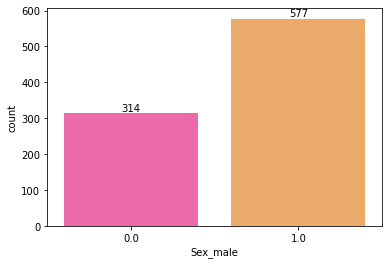

In [83]:
ax=sns.countplot(x='Sex_male', data=data, palette='spring')
ax.bar_label(ax.containers[0])

[Text(0, 0, '468'), Text(0, 0, '109')]

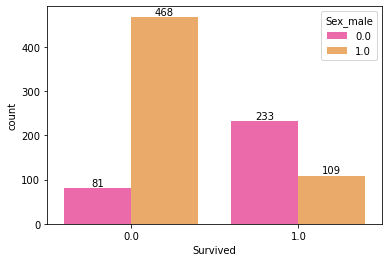

In [84]:
ax=sns.countplot(x='Survived', hue='Sex_male', data=data, palette='spring')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
# Plus d'hommes DCD et plus de femmes survivantes

Biais lié au sexe en faveur des femmmes

Utilisation librairie de vigilance aux biais : AI fairness 360

AIF360 : librairie pour détecter et atténuer les biais

In [85]:
pip install aif360

Note: you may need to restart the kernel to use updated packages.


In [86]:
pip install aif360[AdversarialDebiasing]

In [87]:
import aif360
from  aif360.datasets  import  BinaryLabelDataset   # Pour convertir les données?  exigé par aif360
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing

Convertir les données

In [88]:
BinaryTrainData = BinaryLabelDataset(df=pd.concat((X_train, y_train),
                                               axis=1),
                                  label_names=['Survived'],
                                  protected_attribute_names=['Sex_male'],
                                  favorable_label=1,
                                  unfavorable_label=0)

privileged_groups = [{'Sex_male': 0}]
unprivileged_groups = [{'Sex_male': 1}]

In [89]:
BinaryTestData = BinaryLabelDataset(df=pd.concat((X_test, y_test),
                                               axis=1),
                                  label_names=['Survived'],
                                  protected_attribute_names=['Sex_male'],
                                  favorable_label=1,
                                  unfavorable_label=0)

privileged_groups = [{'Sex_male': 0}]
unprivileged_groups = [{'Sex_male': 1}]

Métriques

It's the difference in mean outcomes when the data is split by the un/privileged groups we defined. If it's not 0, one group has better outcomes that the other

In [90]:
metric_orig_train = BinaryLabelDatasetMetric(BinaryTrainData, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
print("Train set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())
metric_orig_test = BinaryLabelDatasetMetric(BinaryTestData, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
print("Test set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_test.mean_difference())

Train set: Difference in mean outcomes between unprivileged and privileged groups = -0.552480
Test set: Difference in mean outcomes between unprivileged and privileged groups = -0.553623


Donc dans dataset train et test : male non privilégié car score négatif , comment corriger? :

Reweighing

In [91]:
rw = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
BinaryTrainData_f = rw.fit_transform(BinaryTrainData)

Nouveaux poids attribués pour chaque personne afin de compenser le privilège de survie attribué aux femmes

In [94]:
#Data2 = {'Sex': [X_train.Sex_male], 'Survived': [y_train], 'Original_weight': [np.ones(shape=(X_train.shape[0],))], 'new_weight': [BinaryTrainData_f.instance_weights]}
#df = pd.DataFrame (Data2)
#df.head()

In [95]:
pd.DataFrame({'Sex': X_train.Sex_male,
              'Survived': y_train,
              'Original_weight': np.ones(shape=(X_train.shape[0],)),
              'new_weight': BinaryTrainData_f.instance_weights}).sample(15)

Sex  Survived  Original_weight  new_weight
857  1.0       1.0              1.0    2.020470
829  0.0       1.0              1.0    0.509498
735  1.0       0.0              1.0    0.766366
721  1.0       0.0              1.0    0.766366
631  1.0       0.0              1.0    0.766366
635  0.0       1.0              1.0    0.509498
526  0.0       1.0              1.0    0.509498
384  1.0       0.0              1.0    0.766366
574  1.0       0.0              1.0    0.766366
444  1.0       1.0              1.0    2.020470
147  0.0       0.0              1.0    2.387202
355  1.0       0.0              1.0    0.766366
92   1.0       0.0              1.0    0.766366
601  1.0       0.0              1.0    0.766366
464  1.0       0.0              1.0    0.766366

In [96]:
metric_transf_train = BinaryLabelDatasetMetric(BinaryTrainData_f, 
                                               unprivileged_groups=unprivileged_groups,
                                               privileged_groups=privileged_groups)
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_transf_train.mean_difference())

Difference in mean outcomes between unprivileged and privileged groups = 0.000000


Test des 2 modèles sur data transformées :

aide/site source : https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_reweighing_preproc.ipynb

In [98]:
X_train_reweighed = BinaryTrainData_f.features
y_train_reweighed = BinaryTrainData_f.labels.ravel()

X_test_reweighed = BinaryTestData.features
y_test_reweighed = BinaryTestData.labels.ravel()

Régression logistique

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
log_reg = LogisticRegression(max_iter=300)

In [101]:
lr_reweighed = log_reg.fit(X_train_reweighed, y_train_reweighed)

In [102]:
y_pred_reweighed = logistic_regression.predict(X_test_reweighed)
y_pred_reweighed

X does not have valid feature names, but LogisticRegression was fitted with feature names


array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1.])

In [103]:
accuracy_score(y_test_reweighed, y_pred_reweighed)

0.8212290502793296

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       105
         1.0       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [105]:
lr_reweighed_confusion_matrix = confusion_matrix(y_test, y_pred_reweighed)
print (lr_reweighed_confusion_matrix)

[[91 14]
 [18 56]]


Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
R_forest = RandomForestClassifier(max_depth=10, n_estimators = 100)

In [108]:
R_forest.fit(X_train_reweighed, y_train_reweighed)

RandomForestClassifier(max_depth=10)

In [109]:
R_forest_prediction_reweighed = R_forest.predict(X_test)

X has feature names, but RandomForestClassifier was fitted without feature names


In [110]:
accuracy_score(y_test, R_forest_prediction_reweighed)

0.8324022346368715

In [111]:
print(classification_report(y_test, R_forest_prediction_reweighed))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       105
         1.0       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



In [112]:
R_forest_confusion_matrix = confusion_matrix(y_test, R_forest_prediction_reweighed)
print(R_forest_confusion_matrix)

[[92 13]
 [17 57]]


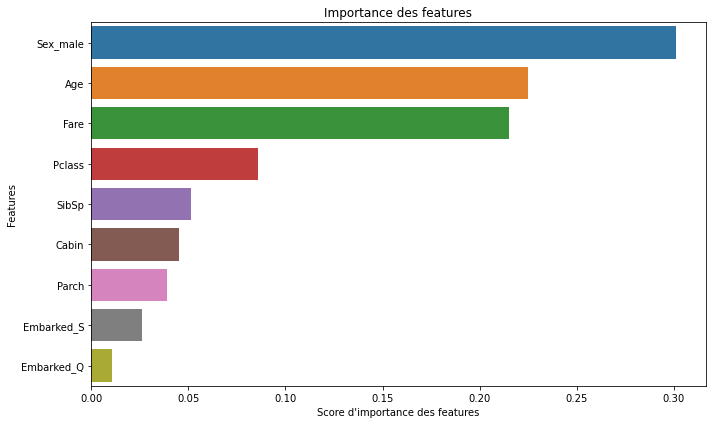

In [113]:
#https://medium.com/analytics-vidhya/random-forest-on-titanic-dataset-88327a014b4d
X_train_reweighed = pd.DataFrame(X_train_reweighed, columns= ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Sex_male',
       'Embarked_Q', 'Embarked_S'])

FeatureImportance = pd.Series(R_forest.feature_importances_, index=X_train_reweighed.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=FeatureImportance, y=FeatureImportance.index)
# Légendes et apparence
plt.xlabel("Score d'importance des features")
plt.ylabel('Features')
plt.title("Importance des features")
plt.tight_layout()

#Pour un modèle plus explicable

In [114]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=R_forest.predict_proba
)

exp.show_in_notebook(show_table=True)